In [51]:
import torch
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt

In [52]:
# Cargar un modelo preentrenado
model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet50', pretrained=True)
model.eval()

Using cache found in C:\Users\celta/.cache\torch\hub\pytorch_vision_v0.10.0


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

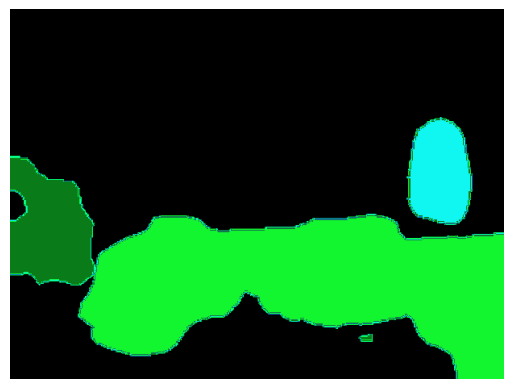

In [71]:
import torch
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt

# Cargar un modelo preentrenado
model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet50', pretrained=True)
model.eval()

# Preprocesar la imagen
preprocess = T.Compose([
    T.Resize(256),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_image = Image.open("Test06.png")
input_image = input_image.convert('RGB')
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)  # Crear un mini-lote como se espera por el modelo

if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)['out'][0]
    output_predictions = output.argmax(0)

palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype('uint8')

r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
r.putpalette(colors)
plt.imshow(r)
plt.axis('off')
plt.show()



Using cache found in C:\Users\celta/.cache\torch\hub\pytorch_vision_v0.10.0
c:\Users\celta\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


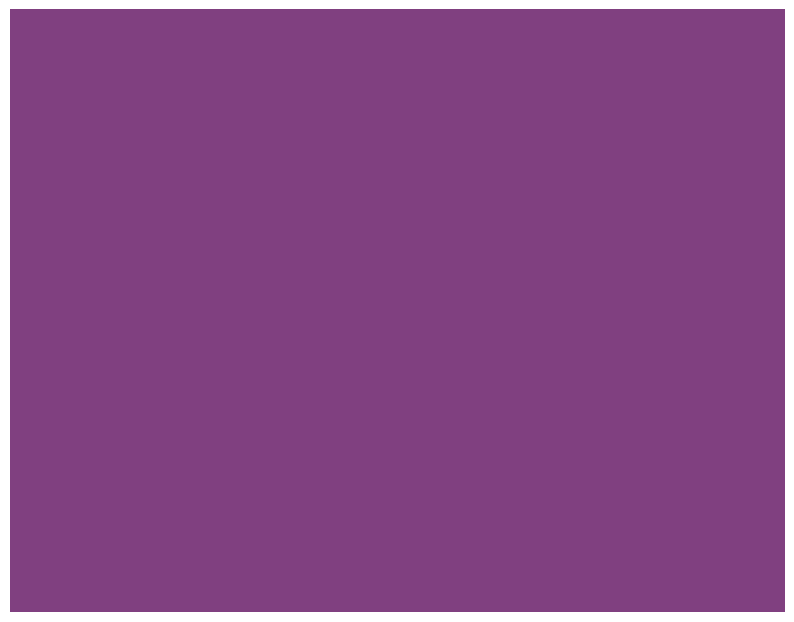

In [86]:
import torch # type: ignore
import torchvision.transforms as T # type: ignore
from PIL import Image # type: ignore
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore

# Cargar un modelo preentrenado (puedes probar con resnet101 para mayor precisión)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet50', pretrained=True)
model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet101', pretrained=True)  # ResNet101
model.eval()

# Preprocesar la imagen (considera el tamaño original o un tamaño proporcional)
preprocess = T.Compose([
    # T.Resize(256),  #  Prueba con un tamaño mayor o proporcional al original
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_image = Image.open("Carretera02.jpg")
input_image = input_image.convert('RGB')

# Ajustar el tamaño de la imagen para que sea divisible por 32 (o un factor común)
# Esto puede ayudar a la red a trabajar mejor.
w, h = input_image.size
new_w = (w // 32) * 32
new_h = (h // 32) * 32
input_image = input_image.resize((new_w, new_h))


input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)

if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)['out'][0]
    output_predictions = output.argmax(0)

# Mejorar la visualización: usar una paleta de colores más distintiva
# y mapear las clases a colores específicos.
def create_cityscapes_colormap():
    """Creates a Cityscapes-like colormap."""
    colormap = np.zeros((256, 3), dtype=np.uint8)
    colormap[0] = [128, 64, 128]  # Carretera
    colormap[1] = [244, 35, 232]  # Acera
    colormap[2] = [70, 70, 70]    # Edificio
    colormap[3] = [102, 102, 156] # Muro
    colormap[4] = [190, 153, 153] # Baranda
    colormap[5] = [153, 153, 153] # Poste
    colormap[6] = [250, 170, 30]  # Semáforo
    colormap[7] = [220, 220, 0]   # Señal de tráfico
    colormap[8] = [107, 142, 35]  # Vegetación
    colormap[9] = [152, 251, 152] # Terreno
    colormap[10] = [70, 130, 180] # Cielo
    colormap[11] = [220, 20, 60]  # Persona
    colormap[12] = [255, 0, 0]    # Coche
    colormap[13] = [0, 0, 142]    # Moto
    colormap[14] = [0, 0, 70]     # Bicicleta
    colormap[15] = [0, 60, 100]   # Autobús
    colormap[16] = [0, 80, 100]   # Tren
    colormap[17] = [0, 0, 230]    # Camión
    colormap[18] = [119, 11, 32]   # Otros
    colormap[19] = [0, 0, 0]      # Sin etiqueta
    return colormap

colormap = create_cityscapes_colormap()

# Convertir las predicciones a una imagen RGB usando la paleta
output_predictions_np = output_predictions.byte().cpu().numpy()
r = Image.fromarray(colormap[output_predictions_np])
r = r.resize(input_image.size, Image.NEAREST) # Usar NEAREST para evitar artifacts

plt.figure(figsize=(10, 8)) # Ajustar tamaño de la figura
plt.imshow(r)
plt.axis('off')
plt.show()

# Guardar la imagen segmentada
r.save("segmentation_result.png")


Using cache found in C:\Users\celta/.cache\torch\hub\pytorch_vision_v0.10.0
Using cache found in C:\Users\celta/.cache\torch\hub\pytorch_vision_v0.10.0


Usando ResNet50
Tiempo de segmentación: 1.85 segundos
Usando ResNet101
Tiempo de segmentación: 2.70 segundos


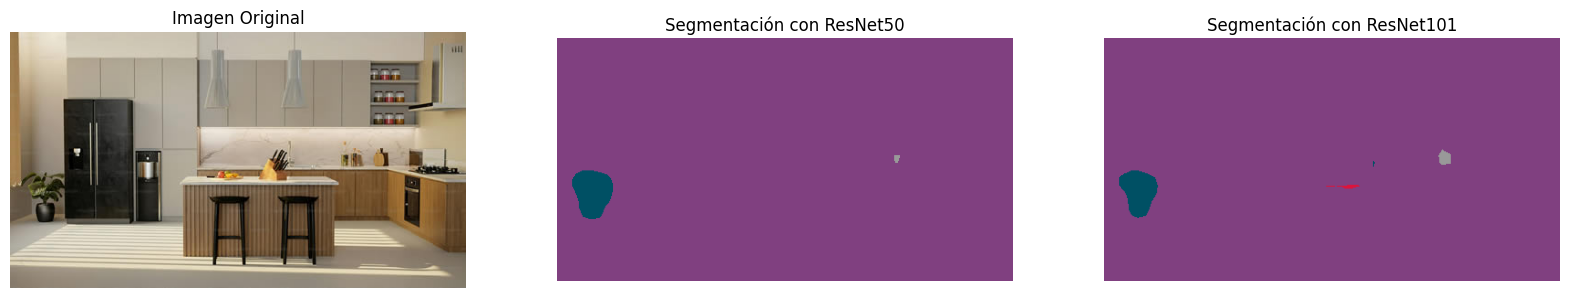

In [11]:
import torch
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import time  # Para medir el tiempo de ejecución

# Dispositivo: usar GPU si está disponible, sino CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Cargar los modelos preentrenado DeepLabv3
model_resnet50 = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet50', pretrained=True).to(device).eval()
model_resnet101 = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet101', pretrained=True).to(device).eval()


# Transformaciones para preprocesar la imagen
preprocess = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Paleta de colores Cityscapes (sin cambios)
def create_cityscapes_colormap():
    """Creates a Cityscapes-like colormap."""
    colormap = np.zeros((256, 3), dtype=np.uint8)
    colormap[0] = [128, 64, 128]  # Carretera
    colormap[1] = [244, 35, 232]  # Acera
    colormap[2] = [70, 70, 70]    # Edificio
    colormap[3] = [102, 102, 156] # Muro
    colormap[4] = [190, 153, 153] # Baranda
    colormap[5] = [153, 153, 153] # Poste
    colormap[6] = [250, 170, 30]  # Semáforo
    colormap[7] = [220, 220, 0]   # Señal de tráfico
    colormap[8] = [107, 142, 35]  # Vegetación
    colormap[9] = [152, 251, 152] # Terreno
    colormap[10] = [70, 130, 180] # Cielo
    colormap[11] = [220, 20, 60]  # Persona
    colormap[12] = [255, 0, 0]    # Coche
    colormap[13] = [0, 0, 142]    # Moto
    colormap[14] = [0, 0, 70]     # Bicicleta
    colormap[15] = [0, 60, 100]   # Autobús
    colormap[16] = [0, 80, 100]   # Tren
    colormap[17] = [0, 0, 230]    # Camión
    colormap[18] = [119, 11, 32]   # Otros
    colormap[19] = [0, 0, 0]      # Sin etiqueta
    return colormap

colormap = create_cityscapes_colormap()

def segment_image(input_image, resnet_option="resnet101"):  # Añadimos el argumento resnet_option
    start_time = time.time()

    # Utilizar los modelos cargados globalmente
    if resnet_option.lower() == "resnet50":
        model = model_resnet50  # Usar el modelo ResNet50 cargado globalmente
        print("Usando ResNet50")
    elif resnet_option.lower() == "resnet101":
        model = model_resnet101  # Usar el modelo ResNet101 cargado globalmente
        print("Usando ResNet101")
    else:
        raise ValueError("Opción de ResNet no válida. Debe ser 'resnet50' o 'resnet101'.")

    model.to(device)
    model.eval()

    # Ajustar tamaño de la imagen (divisible por 32)
    w, h = input_image.size
    new_w = (w // 32) * 32
    new_h = (h // 32) * 32
    input_image = input_image.resize((new_w, new_h))

    input_tensor = preprocess(input_image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(input_tensor)['out'][0]
        output_predictions = output.argmax(0).cpu().numpy()

    segmented_image = Image.fromarray(colormap[output_predictions]).resize(input_image.size, Image.NEAREST)

    end_time = time.time()
    print(f"Tiempo de segmentación: {end_time - start_time:.2f} segundos")

    return segmented_image, input_image


def process_and_segment_image(input_image):
    original_image = input_image.copy()  # Guardar una copia

    segmented_images = {}

    for resnet_option in ["resnet50", "resnet101"]:
        segmented_image, _ = segment_image(input_image, resnet_option)  # Desempacar ambos valores, ignorar el segundo (_)
        segmented_images[resnet_option] = segmented_image

    return original_image, segmented_images


# Ejemplo de uso
image_path = "Test05.jpg"
input_image = Image.open(image_path).convert('RGB')
original_image, segmented_images = process_and_segment_image(input_image)

# Mostrar y guardar las imágenes (original y segmentada)
plt.figure(figsize=(20, 10)) # Ajustar tamaño de la figura para las tres imágenes

plt.subplot(1, 3, 1) # Subplot para la imagen original
plt.imshow(original_image)
plt.title("Imagen Original")
plt.axis('off')

plt.subplot(1, 3, 2) # Subplot para la imagen segmentada con ResNet50
plt.imshow(segmented_images["resnet50"])
plt.title("Segmentación con ResNet50")
plt.axis('off')

plt.subplot(1, 3, 3) # Subplot para la imagen segmentada con ResNet101
plt.imshow(segmented_images["resnet101"])
plt.title("Segmentación con ResNet101")
plt.axis('off')

plt.show()

Usando ResNet50
Tiempo de segmentación: 3.11 segundos
Usando ResNet101
Tiempo de segmentación: 4.17 segundos


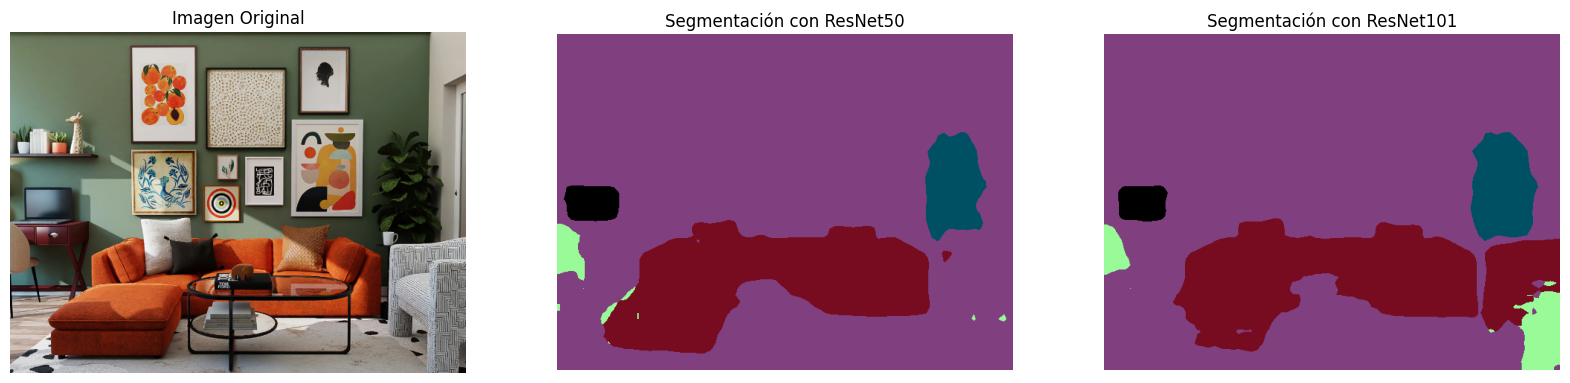

In [15]:
# Ejemplo de uso
image_path = "Test06.png"
input_image = Image.open(image_path).convert('RGB')
original_image, segmented_images = process_and_segment_image(input_image)

# Mostrar y guardar las imágenes (original y segmentada)
plt.figure(figsize=(20, 10)) # Ajustar tamaño de la figura para las tres imágenes

plt.subplot(1, 3, 1) # Subplot para la imagen original
plt.imshow(original_image)
plt.title("Imagen Original")
plt.axis('off')

plt.subplot(1, 3, 2) # Subplot para la imagen segmentada con ResNet50
plt.imshow(segmented_images["resnet50"])
plt.title("Segmentación con ResNet50")
plt.axis('off')

plt.subplot(1, 3, 3) # Subplot para la imagen segmentada con ResNet101
plt.imshow(segmented_images["resnet101"])
plt.title("Segmentación con ResNet101")
plt.axis('off')

plt.show()

In [19]:
!pip install ipywidgets ipython

import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import io

# Widget para cargar una imagen
upload_btn = widgets.FileUpload(
    accept='image/*',  # Aceptar solo imágenes
    multiple=False  # Solo se permite un archivo
)

# Crear un botón para guardar la imagen resultante
save_btn = widgets.Button(description="Guardar Imagen")

# Crear una etiqueta para mostrar la imagen cargada
output = widgets.Output()

# Variable para almacenar la imagen cargada
img = None

# Función para mostrar la imagen cargada
def on_upload_change(change):
    global img
    with output:
        output.clear_output()
        file = change['new']
        if file:
            content = file[0]['content']
            img = Image.open(io.BytesIO(content))
            img.thumbnail((400, 400))  # Redimensionar la imagen para que quepa en el widget
            display(img)

# Función para guardar la imagen
def save_image(event):
    if img:
        img.save("imagen_guardada.png")
        with output:
            output.clear_output()
            print("Imagen guardada como imagen_guardada.png")

upload_btn.observe(on_upload_change, names='value')
save_btn.on_click(save_image)

# Mostrar los widgets en el cuaderno de Jupyter
display(upload_btn)
display(save_btn)
display(output)


   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------- ----------------- 1.3/2.3 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 7.3 MB/s eta 0:00:00


FileUpload(value=(), accept='image/*', description='Upload')

Button(description='Guardar Imagen', style=ButtonStyle())

Output()